We now evaluate the models. We start by comparing the counts of false positives to false negatives for each model, but now they are evaluated on the same continuous day sample of daily living.

In [1]:
import sys
import os
import torch

sys.path.append(os.path.abspath('..')) #so we can import for the dir above

from RegNet import RegNet
from eval_in_time_domain import eval_in_time_domain

In [2]:
RECODING_TO_EVAL_ON = '/home/kuba/Documents/data/raw/kuba_watch_data/2024-07-10_06_42_46'
PATH_TO_BOUT_DIR = '/home/kuba/Documents/data/raw/listerine/3_final'


WINDOW_SIZE = 400
STRIDE = 50
CONFIDANCE_THRESHOLD = 0.95
OVERLAP_THRESHOLD = 0.85
MIN_BOUT_LEN = 400
NUM_BOUT_TO_SAMP = 45
DEVICE = 'cuda:0'

We know the results from model00 so we will not re-eval and jsut eval on our new model with 95% macro f1 !

In [3]:
# #load model00
# model00_path = '/home/kuba/projects/medication-taking-data/new_start/week02/00_no_movment/94f1_with_filter_noMovmets.pth'
# model = RegNet()
# model.load_state_dict(torch.load(model00_path))

# #get false postive count

# TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
#                                             confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
#                                             num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)


WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 485, Gyro: 485
Bout shape - Acc: 837, Gyro: 837
Bout shape - Acc: 575, Gyro: 575
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 545, Gyro: 545
Bout shape - Acc: 693, Gyro: 693
Bout shape - Acc: 565, Gyro: 565
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 416, Gyro: 416
Bout shape - Acc: 469, Gyro: 469
Bout shape - Acc: 496, Gyro: 496
Bout shape - Acc: 523, Gyro: 523
Bout shape - Acc: 455, Gyro: 455
Bout shape - Acc: 470, Gyro: 470
Bout shape - Acc: 693, Gyro: 693
Bout shape - Acc: 745, Gyro: 745
Bout shape - Acc: 461, Gyro: 461
Bout shape - Acc: 554, Gyro: 554
Bout shape - Acc: 837, Gyro: 837
Bout shape - Acc: 650, Gyro: 650
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 545, Gyro: 545
Bout shape - Acc: 650, Gyro: 650
Bout shape - Acc: 658, Gyro: 658
Bout shape - Acc: 469, Gyro: 469
Bout shape - Acc: 506, Gyro: 506
Bout shape - Acc: 976

/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


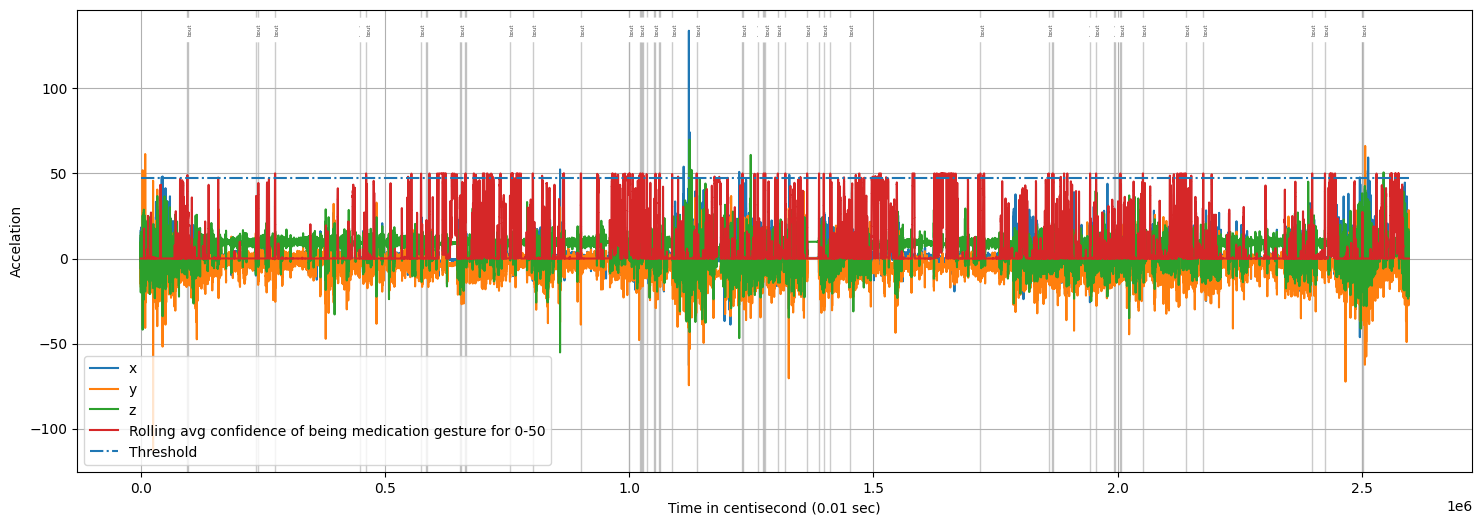

There are 123 FP's of 156 total peaks (confidance over: 0.95 and does not overlap with bout threshold:0.85)
FP's are at rate of 78.85%
TP's are at rate of 21.1538%
Out of 45 model found 33 (73.33)
Normalized on True


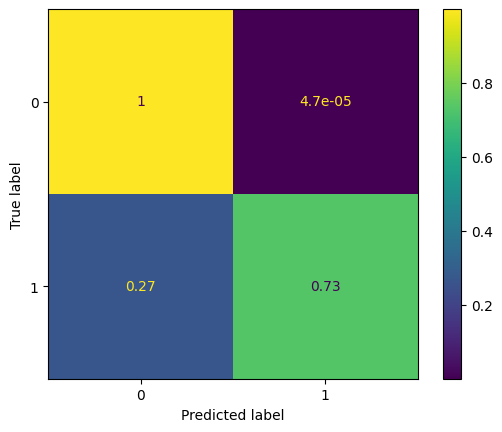

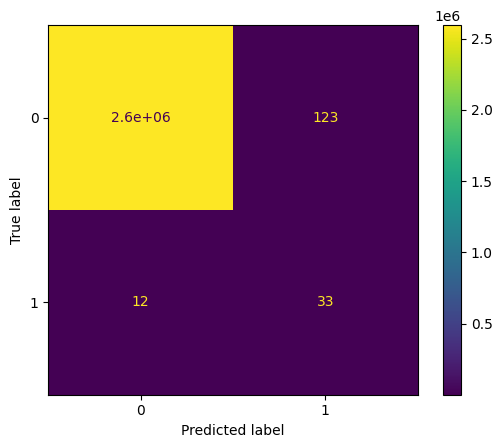

In [4]:
#load model01
model01_path = '/home/kuba/projects/medication-taking-data/new_start/week02/01_augment_loss_weights/95f1_87posweight.pth'
model = RegNet()
model.load_state_dict(torch.load(model01_path))
#get false postive count
TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)

____

Lets check out the 93 f1 model

WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 625, Gyro: 625
Bout shape - Acc: 785, Gyro: 785
Bout shape - Acc: 506, Gyro: 506
Bout shape - Acc: 417, Gyro: 417
Bout shape - Acc: 504, Gyro: 504
Bout shape - Acc: 419, Gyro: 419
Bout shape - Acc: 524, Gyro: 524
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 418, Gyro: 418
Bout shape - Acc: 628, Gyro: 628
Bout shape - Acc: 418, Gyro: 418
Bout shape - Acc: 732, Gyro: 732
Bout shape - Acc: 628, Gyro: 628
Bout shape - Acc: 643, Gyro: 643
Bout shape - Acc: 490, Gyro: 490
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 416, Gyro: 416
Bout shape - Acc: 417, Gyro: 417
Bout shape - Acc: 496, Gyro: 496
Bout shape - Acc: 935, Gyro: 935
Bout shape - Acc: 470, Gyro: 470
Bout shape - Acc: 400, Gyro: 400
Bout shape - Acc: 523, Gyro: 523
Bout shape - Acc: 600, Gyro: 600
Bout shape - Acc: 619, Gyro: 619
Bout shape - Acc: 594

/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


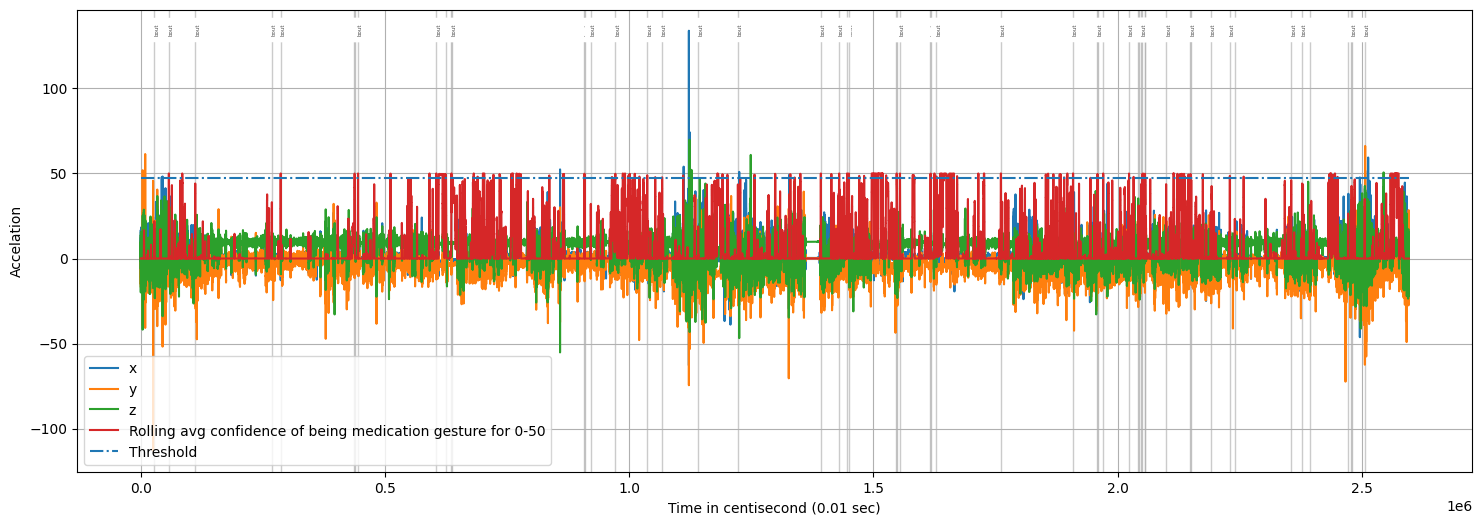

There are 118 FP's of 141 total peaks (confidance over: 0.95 and does not overlap with bout threshold:0.85)
FP's are at rate of 83.69%
TP's are at rate of 16.3121%
Out of 45 model found 23 (51.11)
Normalized on True


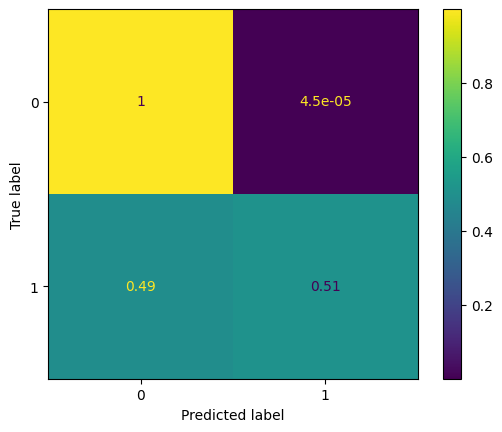

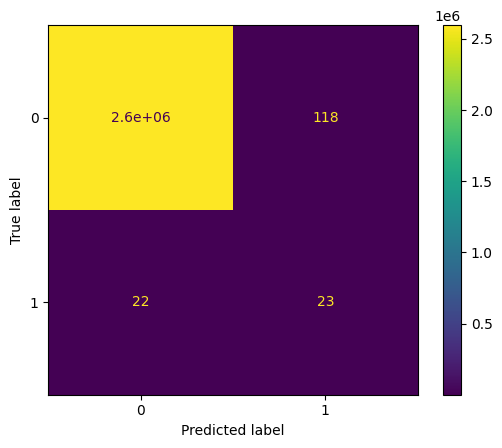

In [5]:
#load model01
model01_path = '/home/kuba/projects/medication-taking-data/new_start/week02/01_augment_loss_weights/93f1_87posweight.pth'
model = RegNet()
model.load_state_dict(torch.load(model01_path))
#get false postive count
TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)